In [15]:
import requests
from bs4 import BeautifulSoup
import pickle

def url_to_transcript(url):
    page=requests.get(url).text
    soup=BeautifulSoup(page,"lxml")
    text=[p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text
    
# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']


In [16]:
#transcripts = [url_to_transcript(u) for u in urls]


In [17]:
# # Make a new directory to hold the text files
"""!mkdir transcripts
data={}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
         #pickle.dump(transcripts[i], file)
 """           

'!mkdir transcripts\ndata={}\nfor i, c in enumerate(comedians):\n    with open("transcripts/" + c + ".txt", "wb") as file:\n         #pickle.dump(transcripts[i], file)\n '

In [18]:
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)


In [19]:
def combine_text(list_of_text):
    combined_text=' '.join(list_of_text)
    return combined_text


In [20]:
data_combined={key: [combine_text(value)] for (key,value) in data.items()}

In [21]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df


,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [22]:
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [23]:
import re 
import string
def  clean_text_round1(text):
    text=text.lower()
    text= re.sub('\[.*?\!"]','',text)
    text= re.sub('\w*\d\w*','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text
round1 = lambda x: clean_text_round1(x)

In [24]:
def clean_text_round2(text):
    text=re.sub('["''#"...,]','',text)
    text=re.sub('[\n]','',text)
    return text
round2=lambda x: clean_text_round2(x)

In [25]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,cheers and applause all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,theme music orchestral hiphop crowd roars what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the...
jim,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...
joe,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [26]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2 ))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,cheers and applause all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,theme music orchestral hiphop crowd roars what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the...
jim,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...
joe,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,introfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree with ...


In [27]:
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,cheers and applause all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o applaus...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,theme music orchestral hiphop crowd roars what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the...
jim,car horn honks audience cheering announcer ladies and gentlemen please welcome to the stage mr jim jefferies upbeat music playing hello sit down s...
joe,rock music playing audience cheering announcer ladies and gentlemen welcome joe rogan audience cheering and applauding what the fuck is going on s...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,introfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree with ...


In [28]:
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

In [29]:
data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [30]:
data_df.to_pickle("corpus.pkl")

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm



,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [32]:
data_dtm.to_pickle("dtm.pkl")

data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [33]:
import pandas as pd

data=pd.read_pickle('dtm.pkl')
data=data.transpose()
data

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,1,0,0,0,0,0,0,0,1
abject,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
top_dict={}

for c in data.columns:
    top=data[c].sort_values(ascending=False).head(40)# maximum repetition
    top_dict[c]=list(zip(top.index,top.values))
top_dict

{'ali': [('like', 126),
  ('know', 65),
  ('just', 64),
  ('don', 61),
  ('shit', 34),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('women', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('really', 12),
  ('work', 12),
  ('dude', 12),
  ('look', 11),
  ('baby', 11),
  ('uh', 11),
  ('white', 11),
  ('fuck', 11),
  ('asian', 11),
  ('anymore', 10),
  ('feel', 10),
  ('man', 10),
  ('want', 10),
  ('scared', 10),
  ('make', 10),
  ('fingers', 10)],
 'anthony': [('like', 50),
  ('know', 39),
  ('don', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('ve', 28),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('people', 23),
  ('guys', 22),
  ('tell', 19),
  ('grandma', 19),
  ('right', 18),
  ('thing', 18),
  ('think', 17),
  ('time', 17),
  ('good', 16),


In [35]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

ali
like, know, just, don, shit, gonna, ok, lot, oh, wanna
---
anthony
like, know, don, joke, got, said, ve, anthony, just, day
---
bill
like, just, right, know, don, gonna, got, fucking, yeah, shit
---
bo
voice, know, guy, like, bro, love, bo, think, girl, just
---
dave
like, know, said, just, shit, people, didn, don, ahah, time
---
hasan
like, know, don, dad, just, laughter, going, want, got, love
---
jim
like, don, right, fucking, just, went, know, ve, people, day
---
joe
like, people, just, don, fucking, fuck, gonna, know, think, shit
---
john
like, know, just, don, said, clinton, right, little, hey, time
---
louis
like, just, know, don, life, people, thing, gonna, cause, shit
---
mike
like, know, said, just, don, think, says, jenny, cause, right
---
ricky
right, like, just, don, know, ve, said, yeah, fucking, got
---


In [36]:
from collections import Counter
word=[]
for comedian in data.columns:
    top=[word for (word,count) in top_dict[comedian]]
    for t in top:
        word.append(t)
word

['like',
 'know',
 'just',
 'don',
 'shit',
 'gonna',
 'ok',
 'lot',
 'oh',
 'wanna',
 'gotta',
 'husband',
 'got',
 'right',
 'women',
 'time',
 'cause',
 'day',
 'people',
 'pregnant',
 'god',
 'need',
 'yeah',
 'tell',
 'really',
 'work',
 'dude',
 'look',
 'baby',
 'uh',
 'white',
 'fuck',
 'asian',
 'anymore',
 'feel',
 'man',
 'want',
 'scared',
 'make',
 'fingers',
 'like',
 'know',
 'don',
 'joke',
 'got',
 'said',
 've',
 'anthony',
 'just',
 'day',
 'say',
 'people',
 'guys',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'time',
 'good',
 'school',
 'baby',
 'dad',
 'yeah',
 'did',
 'gonna',
 'jokes',
 'okay',
 'shark',
 'didn',
 'family',
 'hate',
 'mad',
 'lot',
 'come',
 'money',
 'new',
 'little',
 'things',
 'san',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'fuck',
 'll',
 'think',
 'want',
 'guy',
 'let',
 'people',
 'did',
 'didn',
 'make',
 'come',
 'thing',
 'going',
 'doing',
 'little',
 'everybody',


In [37]:
Counter(word).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 10),
 ('think', 10),
 ('gonna', 9),
 ('oh', 9),
 ('fuck', 9),
 ('say', 9),
 ('said', 8),
 ('ve', 8),
 ('ll', 8),
 ('shit', 7),
 ('cause', 7),
 ('yeah', 7),
 ('really', 7),
 ('want', 7),
 ('thing', 7),
 ('good', 7),
 ('didn', 7),
 ('little', 7),
 ('guy', 7),
 ('day', 6),
 ('man', 6),
 ('did', 6),
 ('come', 6),
 ('fucking', 6),
 ('going', 6),
 ('lot', 4),
 ('tell', 4),
 ('let', 4),
 ('kid', 4),
 ('old', 4),
 ('life', 4),
 ('girl', 4),
 ('way', 4),
 ('mean', 4),
 ('women', 3),
 ('dude', 3),
 ('look', 3),
 ('white', 3),
 ('make', 3),
 ('guys', 3),
 ('dad', 3),
 ('okay', 3),
 ('things', 3),
 ('hey', 3),
 ('went', 3),
 ('goes', 3),
 ('ok', 2),
 ('gotta', 2),
 ('god', 2),
 ('baby', 2),
 ('uh', 2),
 ('feel', 2),
 ('joke', 2),
 ('school', 2),
 ('money', 2),
 ('new', 2),
 ('everybody', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('mom', 2),
 ('parents', 2),
 ('house', 2)

In [38]:
add_stop_words = [word for word, count in Counter(word).most_common() if count > 6]
add_stop_words



['like',
 'know',
 'just',
 'don',
 'right',
 'people',
 'got',
 'time',
 'think',
 'gonna',
 'oh',
 'fuck',
 'say',
 'said',
 've',
 'll',
 'shit',
 'cause',
 'yeah',
 'really',
 'want',
 'thing',
 'good',
 'didn',
 'little',
 'guy']

In [39]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [40]:

# Let's make some word clouds!

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [41]:

# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

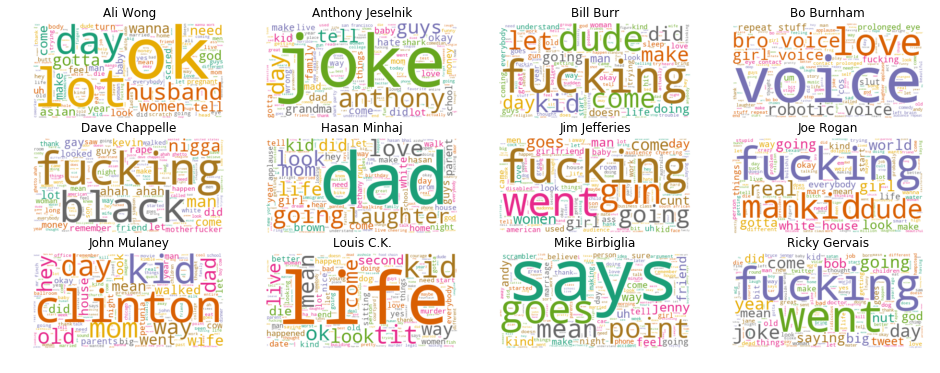

In [42]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])#generate data cloud for each one 
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [52]:
unique_list=[]
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

data_words=pd.DataFrame(list((zip(full_names,unique_list))),columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort
    

,comedian,unique_words
1,Anthony Jeselnik,957
9,Louis C.K.,1047
3,Bo Burnham,1280
6,Jim Jefferies,1314
0,Ali Wong,1322
8,John Mulaney,1346
4,Dave Chappelle,1361
7,Joe Rogan,1427
10,Mike Birbiglia,1455
5,Hasan Minhaj,1569


In [59]:
total_list=[]
for comedian in data.columns:
    total=sum(data[comedian])
    total_list.append(total)
    
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

data_words['total_list']=total_list
data_words['runtimes']= run_times
data_words['rate']=data_words['total_list']/data_words['runtimes']
data_words=data_words.sort_values(by='rate')
data_words

,comedian,unique_words,total_list,runtimes,rate
1,Anthony Jeselnik,957,2767,59,46.898305
0,Ali Wong,1322,3102,60,51.700000
9,Louis C.K.,1047,3077,58,53.051724
10,Mike Birbiglia,1455,4430,76,58.289474
11,Ricky Gervais,1583,4627,79,58.569620
4,Dave Chappelle,1361,3926,67,58.597015
3,Bo Burnham,1280,3517,60,58.616667
6,Jim Jefferies,1314,4620,77,60.000000
8,John Mulaney,1346,3829,62,61.758065
5,Hasan Minhaj,1569,4643,73,63.602740


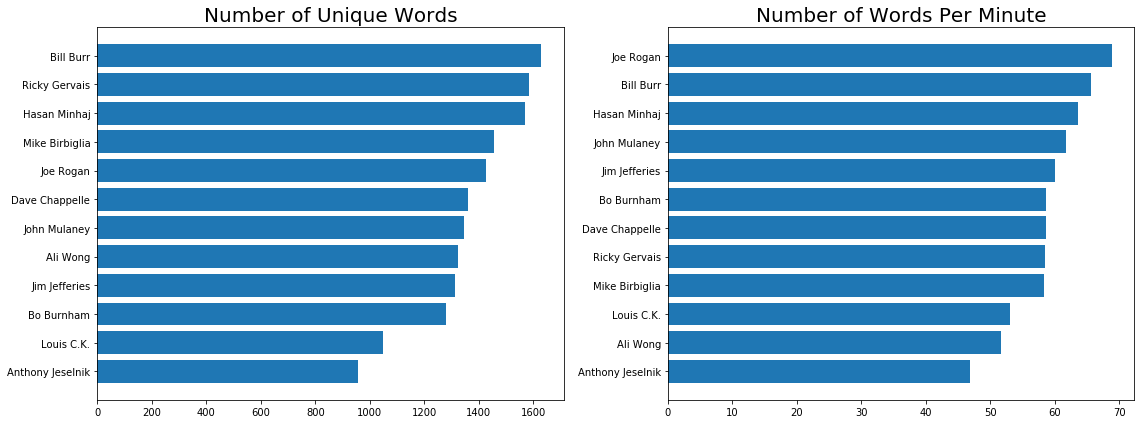

In [64]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_words.rate, align='center')
plt.yticks(y_pos, data_words.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()


In [66]:
Counter(word).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 10),
 ('think', 10),
 ('gonna', 9),
 ('oh', 9),
 ('fuck', 9),
 ('say', 9),
 ('said', 8),
 ('ve', 8),
 ('ll', 8),
 ('shit', 7),
 ('cause', 7),
 ('yeah', 7),
 ('really', 7),
 ('want', 7),
 ('thing', 7),
 ('good', 7),
 ('didn', 7),
 ('little', 7),
 ('guy', 7),
 ('day', 6),
 ('man', 6),
 ('did', 6),
 ('come', 6),
 ('fucking', 6),
 ('going', 6),
 ('lot', 4),
 ('tell', 4),
 ('let', 4),
 ('kid', 4),
 ('old', 4),
 ('life', 4),
 ('girl', 4),
 ('way', 4),
 ('mean', 4),
 ('women', 3),
 ('dude', 3),
 ('look', 3),
 ('white', 3),
 ('make', 3),
 ('guys', 3),
 ('dad', 3),
 ('okay', 3),
 ('things', 3),
 ('hey', 3),
 ('went', 3),
 ('goes', 3),
 ('ok', 2),
 ('gotta', 2),
 ('god', 2),
 ('baby', 2),
 ('uh', 2),
 ('feel', 2),
 ('joke', 2),
 ('school', 2),
 ('money', 2),
 ('new', 2),
 ('everybody', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('mom', 2),
 ('parents', 2),
 ('house', 2)

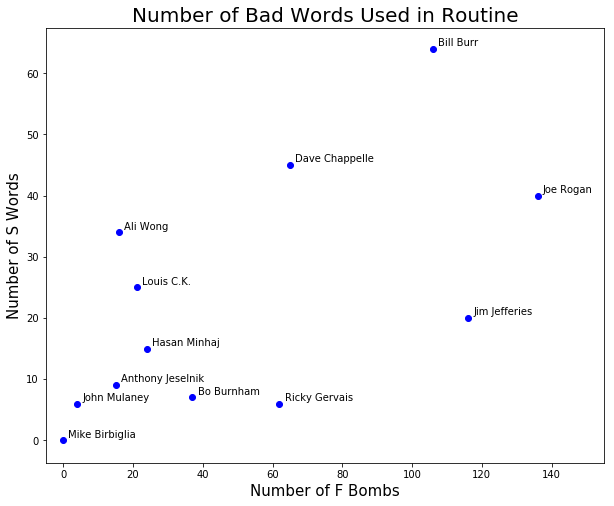

In [70]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()